<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">



# <center> 11. A brief introduction to CNN: learning features! </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

## <span style="color:red"> Outline </span> 
1. **CNN: Introduction of Convolutional neuronal networks**
2. **CNN: Main CNN componets**
3. **CNN: Visualizing CNN**
4. **CNN: An specific architecture**



In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## <span style="color:green"> If you are in colaboratoy </span>: 

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/cv-uis-student/notebooks
/content/drive/My Drive/cv-uis-student/notebooks


## <span style="color:red"> 1. CNN: Introduction of Convolutional neuronal networks </span> 

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN.png">  

The Convolutional neuronal net architectures are able to successfully capture the Spatial dependencies of the images, through the learning of most descriptive filters. Sime additional features are: 

- The  first ConvLayer captures the Low-Level features such as edges, color. Learn **BEST FEATURES** for a particular problem
    - Then the next convlayer learn high-level features of these primitives
    
- From biology, is analogous to connectivity pattern of Neurons in the Human Brain. **Emulate visual cortex!**, only respond in a restricted region of visual field. 
- The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

- Performs a better fitting learning due to the reduction in the number of parameters. 
    - For instace. For an image in DNN $(224 \times 224 \times 3) =105.528$ input features
    - an hidden layer of 1024 (very small respect to the input) is $(105.528 \times 1024)$ that gives **150 millons of parameters!**... imposible to train!
- Are invariant to spatial position of the objects. If an object is in different position of an image the DNN react very different.    

### Learning convolutions


| | |
|:-------------------------:|:-------------------------:|
|<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Convolution_schematic.gif"> |  <img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-2.png">|

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-3.gif"> 


- **Stride length**: The Kernel shifts every time to perform operation between Kernel and the portion of the image.

- **Padding:** The process to add *artifitial* columns or rows to obtain same image input dimensions.
    - same padding... add rows and colums to obtain in response the same image dimension
    - valid padding: Not use any padding. 
    formula padding


#### We learn  features from low to high level !!

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-10.png"> 


**Go to the action!**

- We will use CIFAR10:
    - 50k TRAINING IMAGES
    - 10k TESTING IMAGES
    - images are 32 $\times$ 32 images by 3 channels

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print( "CIFAR 10")
print( x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

170500096/170498071 [==============================] - 13s 0us/step
CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
1.15.0


## <span style="color:orange">student Challenge</span>: 

1. Because limitation on course computers, we will reduce again the CIFAR-10, to CIFAR-3 and test our approach.
    - redefine train and test sets, from CIFAR-10, taking only 3 actions. 

In [8]:
class_names_10 = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names_3 = {'cat':0, 'horse':1, 'dog':2}
class_names_3.keys()
    

dict_keys(['cat', 'horse', 'dog'])

In [9]:

x_tr_3, x_te_3, y_tr_3, y_te_3 = [],[],[],[]

for num,class_i in enumerate(y_train):
    if class_names_10[int(class_i)] in class_names_3.keys():
        y_tr_3.append(class_names_3[class_names_10[int(class_i)]])
        x_tr_3.append(x_train[num])
        
for num,class_i in enumerate(y_test):
    if class_names_10[int(class_i)] in class_names_3.keys():
        y_te_3.append(class_names_3[class_names_10[int(class_i)]])
        x_te_3.append(x_test[num])



x_tr_3, x_te_3, y_tr_3, y_te_3 = np.array(x_tr_3), np.array(x_te_3), np.array(y_tr_3), np.array(y_te_3)      

print (y_te_3.shape, x_te_3.shape, y_tr_3.shape, x_tr_3.shape)

(3000,) (3000, 32, 32, 3) (15000,) (15000, 32, 32, 3)


Show some examples 

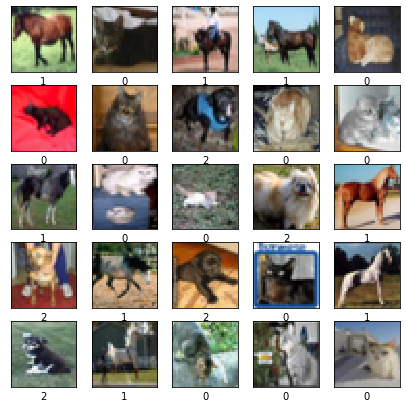

In [10]:

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_tr_3[i].reshape(32,32,3), cmap=plt.cm.binary)
    plt.xlabel(y_tr_3[i])
    

a simple preprocessing and format of data

In [11]:


x_tr_3 = x_tr_3.reshape([-1, 32, 32, 3])
x_te_3 = x_te_3.reshape([-1, 32, 32, 3])

x_tr_3 = x_tr_3.astype('float32')
x_te_3 = x_te_3.astype('float32')

# one hot encode target values
#y_tr_3 = to_categorical(y_tr_3)
#y_te_3 = to_categorical(y_te_3)
#keras.utils.np_utils.to_categorical

x_tr_3 /= 255
x_te_3 /= 255
print('x_train shape:', x_tr_3.shape)
print('Number of images in x_train', x_tr_3.shape[0])
print('Number of images in x_test', x_te_3.shape[0])

x_train shape: (15000, 32, 32, 3)
Number of images in x_train 15000
Number of images in x_test 3000


understanding from an example 

In [12]:
model_CNN =  keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(keras.layers.Dense(3, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:

model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,059,235
Trainable params: 1,059,235
Non-trainable params: 0
______________________________________________

In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 

In [16]:
history = model_CNN.fit(x_tr_3, y_tr_3, epochs=10, batch_size=64,
                    validation_data=(x_te_3, y_te_3))

Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 8s 544us/sample - loss: 0.9999 - acc: 0.4934 - val_loss: 0.9272 - val_acc: 0.5503
Epoch 2/10
15000/15000 [==============================] - 1s 77us/sample - loss: 0.8822 - acc: 0.5744 - val_loss: 0.8606 - val_acc: 0.5870
Epoch 3/10
15000/15000 [==============================] - 1s 79us/sample - loss: 0.8337 - acc: 0.6084 - val_loss: 0.8654 - val_acc: 0.5923
Epoch 4/10
15000/15000 [==============================] - 1s 79us/sample - loss: 0.7995 - acc: 0.6289 - val_loss: 0.8391 - val_acc: 0.5970
Epoch 5/10
15000/15000 [==============================] - 1s 78us/sample - loss: 0.7743 - acc: 0.6430 - val_loss: 0.7877 - val_acc: 0.6347
Epoch 6/10
15000/15000 [==============================] - 1s 78us/sample - loss: 0.7392 - acc: 0.6695 - val_loss: 0.7688 - val_acc: 0.6347
Epoch 7/10
15000/15000 [==============================] - 1s 81us/sample - loss: 0.7176 - acc: 0.6795 - val_loss: 0.

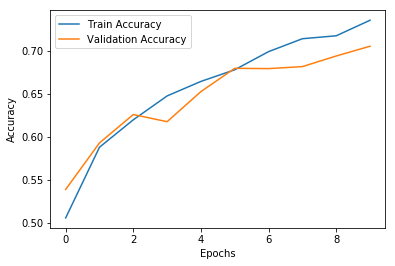

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## <span style="color:orange">student Challenge</span>: 
1. How is the performance with respect to DNN?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 771       
Total params: 1,705,475
Trainable params: 1,705,475
Non-trainable params: 0
_________________________________________________________________


Train on 15000 samples, validate on 3000 samples
Epoch 1/10
15000/15000 [==============================] - 6s - loss: 0.9973 - acc: 0.4894 - val_loss: 0.9894 - val_acc: 0.4920
Epoch 2/10
15000/15000 [==============================] - 5s - loss: 0.9147 - acc: 0.5553 - val_loss: 0.9268 - val_acc: 0.5317
Epoch 3/10
15000/15000 [==============================] - 6s - loss: 0.8773 - acc: 0.5759 - val_loss: 0.8718 - val_acc: 0.5820
Epoch 4/10
15000/15000 [==============================] - 6s - loss: 0.8531 - acc: 0.5930 - val_loss: 0.8776 - val_acc: 0.5767
Epoch 5/10
15000/15000 [==============================] - 6s - loss: 0.8380 - acc: 0.6035 - val_loss: 0.8681 - val_acc: 0.5867
Epoch 6/10
15000/15000 [==============================] - 6s - loss: 0.8202 - acc: 0.6111 - val_loss: 0.8331 - val_acc: 0.6023
Epoch 7/10
15000/15000 [==============================] - 5s - loss: 0.8065 - acc: 0.6187 - val_loss: 0.8298 - val_acc: 0.6013
Epoch 8/10
15000/15000 [==============================] - 6s -

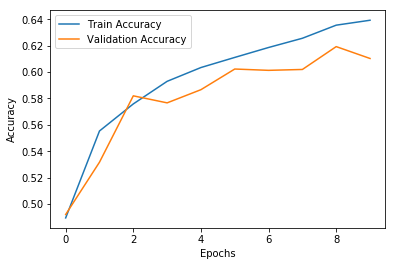

In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_DNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 
history = model_DNN.fit(x_tr_3, y_tr_3, epochs=10, batch_size=64,
                    validation_data=(x_te_3, y_te_3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

2. Built a deeply of convolutional model by including two CNN layers of 64 filters with kerneles ($3 \times 3$). Activation relu. This layers are put after first two layers. 
    - Add a MaxPooling (2x2)

In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_2.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 

In [0]:
history = model_2.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

2. Put additional two deep layers of 128 filters with kernels: `(3,3)` 
    - Add a `MaxPooling (2x2)`

In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_3.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 

In [0]:
history = model_3.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

In [0]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## <span style="color:red"> 2. CNN: Main CNN componets </span> 

### Convolutional (Conv) Layers

A set of filters to turn input images into output images (responses). For instance, using **valid padding** and 8 filters, we obtain: 
<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-7.png"> 

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-12.png">

### Pooling Layers

These layers are speciallized on reduce spatial size of CNN features, allowing  decrease the computational time and  extracting **dominant features** which are rotational and positional invariant. Also allows as a Noise Suppressant

There are two types of pooling: **Max-Pooling**, **Average pooling**. 
<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-4.jpeg">  

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-8.png">


###  Fully-Connected layer

learn non-linear combinations of the high-level features and robustly represent the descriptor for any input. 

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-9.png">


So, a Typical configuration of a **CNN** architecture, will be. 

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/CNN-13.png">

## <span style="color:red"> 3.CNN: visualizing filters</span> 

One of the major advantajes of CNN coding is the computation of image features. 

## Filter visualization

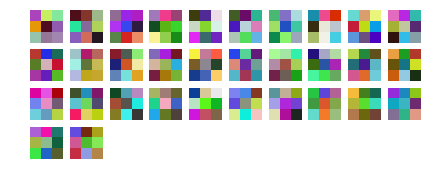

In [0]:
w = model_CNN.get_weights()[0]
plt.figure(figsize=(7,7))
w = (w-np.min(w))/(np.max(w)-np.min(w))
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:,:,:,i])
    plt.axis("off")

In [0]:
w0 = model_CNN.get_weights()[0]
w2 = model_CNN.get_weights()[2]
print w0.shape, w2.shape

(3, 3, 3, 32) (3, 3, 32, 32)


In [0]:
weights = model_CNN.get_weights()
for i in weights:
    print i.shape

(3, 3, 3, 32)
(32,)
(3, 3, 32, 32)
(32,)
(8192, 128)
(128,)
(128, 3)
(3,)


## Visualizing filter responses

In [18]:
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 32, 32, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 32, 32, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 16, 16, 32) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(?, 8192) dtype=float32>,
 <tf.Tensor 'dense/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_1/Softmax:0' shape=(?, 3) dtype=float32>]

In [0]:
activation_model = keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)

In [20]:
print x_te_3.shape
print x_te_3[0].shape

SyntaxError: ignored

In [0]:
array = np.expand_dims(x_te_3[69], axis=0)
activations = activation_model.predict(array)

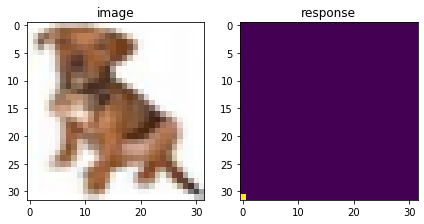

In [24]:
plt.figure(figsize=(7,10))
plt.subplot(121), plt.imshow(x_te_3[69].reshape(32,32,3),'gray'), plt.title('image'); 
plt.subplot(122), plt.imshow(activations[0][0,:, :, 10], cmap='viridis'), plt.title('response');

First layer CONVnet 1

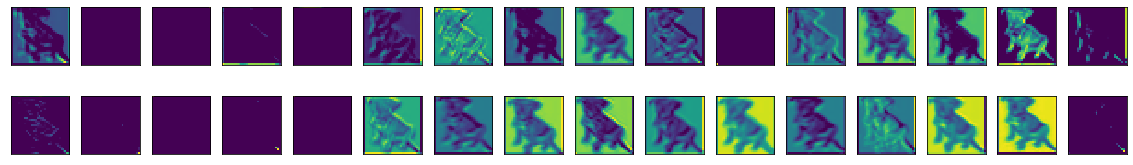

In [25]:

plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[0][0,:, :, i], cmap='viridis')
    

To observe Second layer conv2D and also Maxpooling

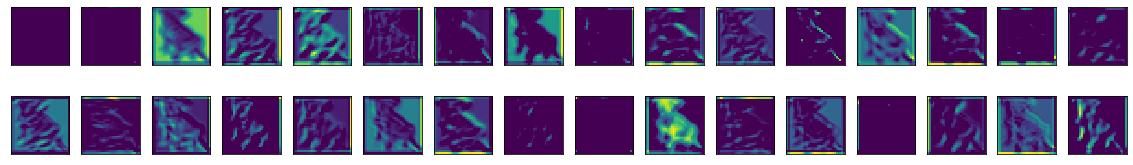

In [26]:

plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[1][0,:, :, i], cmap='viridis')
    

## <span style="color:orange">Student Challenge</span>: 
- Compare the responses for two images in test set

## <span style="color:red"> 4.CNN: An specific architecture</span> 

## <span style="color:orange">student Challenge</span>: 

- Contruct a CNN architecture as illustrated in next figure. 
- Evaluate the performance in MNIST and MNIST-fashion

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Structure-example.png">


# References

[1. A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">